<a href="https://colab.research.google.com/github/Harsha-Gobinath/Data_Science/blob/main/multiple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Student_Performance.csv to Student_Performance.csv


In [ ]:
data = pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Data Preprocessing

In [ ]:
data = data.dropna()
data.shape

(10000, 6)

In [ ]:
output_col = 'Performance Index'

In [ ]:
x = data.iloc[:,data.columns != output_col]
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


In [ ]:
y = data.loc[:,output_col]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)
data.shape

(10000, 6)

In [ ]:
x_test.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.001500,69.870000,6.524500,4.581500
std,2.574065,17.283763,1.703776,2.827429
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,55.000000,5.000000,2.000000
50%,5.000000,70.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


In [ ]:
x_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.990750,69.339625,6.532125,4.583750
std,2.593261,17.357425,1.693982,2.877416
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000
50%,5.000000,69.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


In [ ]:
y_test.shape

(2000,)

In [ ]:
y_train.shape

(8000,)

Multiple Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)



LinearRegression()

In [ ]:
lr.coef_

array([ 2.85644369,  1.01931286,  0.47755873,  0.20133332, -0.29615249,
        0.29615249])

In [ ]:
lr.intercept_

-33.85889426406798

Label Encoding

In [ ]:
x_train.describe()



,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,4.990750,69.339625,6.532125,4.583750
std,2.593261,17.357425,1.693982,2.877416
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000
50%,5.000000,69.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


Prediction


In [ ]:
x_test.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.001500,69.870000,6.524500,4.581500
std,2.574065,17.283763,1.703776,2.827429
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,55.000000,5.000000,2.000000
50%,5.000000,70.000000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


In [ ]:
x_test = pd.get_dummies(x_test, columns=['Extracurricular Activities'])

In [ ]:
pred_value = lr.predict(x_test)
pred_value

array([51.69936447, 35.432019  , 82.91206933, ..., 31.50292532,
       46.57994193, 29.19002375])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
cost = mean_squared_error(y_test, pred_value)
cost

4.122956692728871

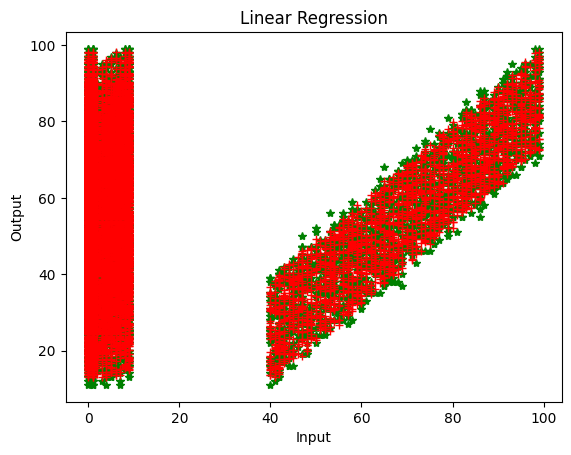

In [ ]:
plt.plot(x_test, y_test, '*', color = 'green')
plt.plot(x_test, pred_value, '+', color = 'red')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Linear Regression')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
accuracy = r2_score(y_test, pred_value)
print("Accuracy (R-squared):", accuracy)

Accuracy (R-squared): 0.9886750113507796


In [57]:
pred_value

array([51.69936447, 35.432019  , 82.91206933, ..., 31.50292532,
       46.57994193, 29.19002375])

In [58]:
y_test

9415    53.0
6377    34.0
8019    83.0
7754    86.0
4961    45.0
        ... 
2315    49.0
2166    53.0
211     29.0
3979    48.0
5482    30.0
Name: Performance Index, Length: 2000, dtype: float64

In [60]:
residuals = y_test - pred_value
residuals

9415    1.300636
6377   -1.432019
8019    0.087931
7754   -2.446500
4961    0.458199
          ...   
2315   -1.330722
2166   -2.828811
211    -2.502925
3979    1.420058
5482    0.809976
Name: Performance Index, Length: 2000, dtype: float64

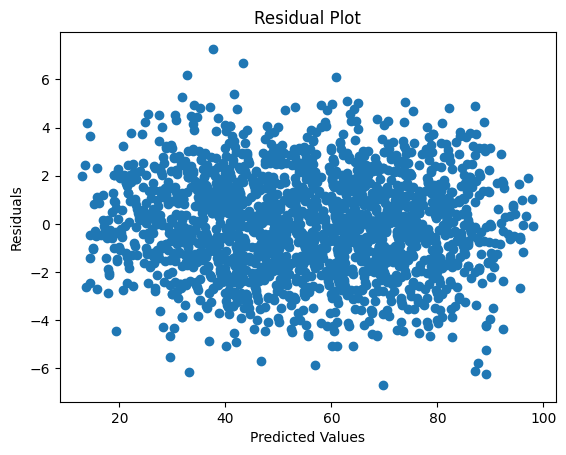

In [61]:
plt.scatter(pred_value, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, pred_value)
cost


4.122956692728871

Normality of Residuals

<ipython-input-64-a10d056572de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


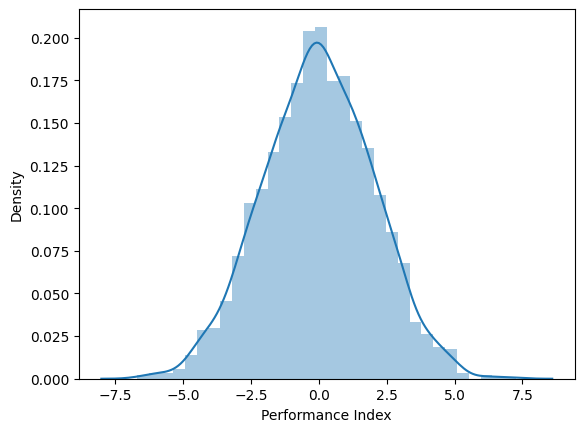

In [64]:
import seaborn as sns
sns.distplot(residuals)
plt.show()